## Import Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv (r'D:/tugas amell/SMT 3/ANALISIS DATA EKSPLORATIF/disney_plus_titles.csv')
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,26-Nov-21,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,26-Nov-21,1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,26-Nov-21,2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,26-Nov-21,2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,25-Nov-21,2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...
...,...,...,...,...,...,...,...,...,...,...,...,...
1445,s1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","United States, United Kingdom",4-Jun-21,2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...
1446,s1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","United States, Canada",2-Apr-21,2009,PG,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...
1447,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","United Kingdom, Germany, United States",18-Dec-20,2016,PG-13,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum..."
1448,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...","United Kingdom, Germany, United States",18-Sep-20,2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...


## Data Cleaning

In [3]:
data.isnull().sum()

show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64

In [8]:
from scipy.stats import mode

data['director'] = data['director'].fillna(data['director'].mode()[0])
data['cast'] = data['cast'].fillna(data['cast'].mode()[0])
data['country'] = data['country'].fillna(data['country'].mode()[0])
data['date_added'] = data['date_added'].fillna(data['date_added'].mode()[0])
data['rating'] = data['rating'].fillna(data['rating'].mode()[0])

In [9]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      1450 non-null   object
 4   cast          1450 non-null   object
 5   country       1450 non-null   object
 6   date_added    1450 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1450 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


In [11]:
data.to_csv("disney_plus_titles_clean.csv")

## Visualisasi

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('D:/tugas amell/SMT 3/ANALISIS DATA EKSPLORATIF/disney_plus_titles.csv')

data.head()
print(data.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


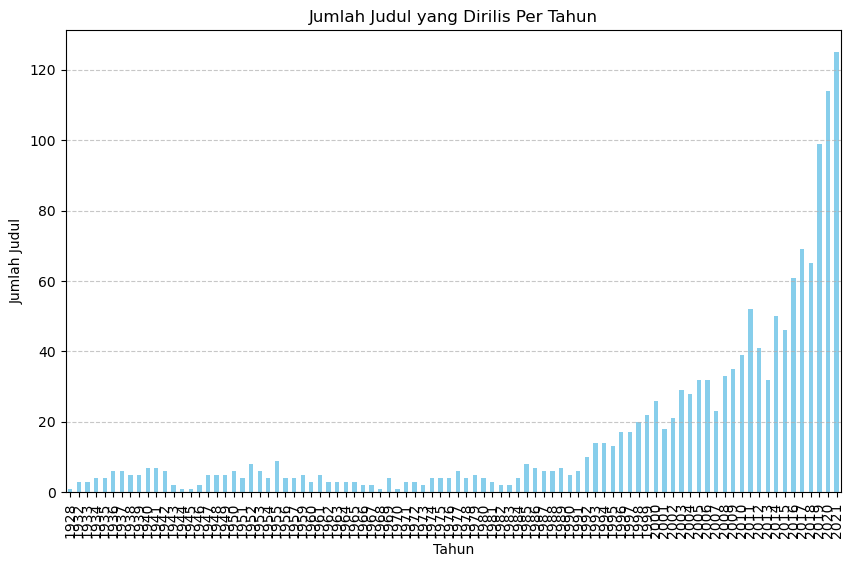

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(10, 6))
data['release_year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Jumlah Judul yang Dirilis Per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Judul')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

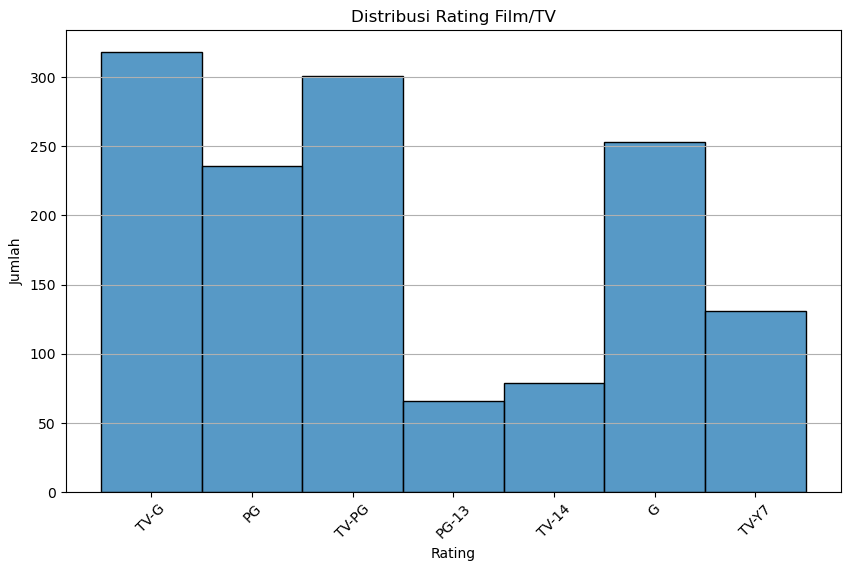

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

df = pd.read_csv("D:/tugas amell/SMT 3/ANALISIS DATA EKSPLORATIF/disney_plus_titles.csv")
df

ratings = ['TV-G', 'PG', 'TV-13', 'TV-14', 'TV-Y7', 'G', 'TV-PG', 'PG-13']
df_filtered = df[df['rating'].isin(ratings)]

plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['rating'], bins=len(ratings), kde=False)
plt.title('Distribusi Rating Film/TV')
plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.grid(True, axis='y') 
plt.show()

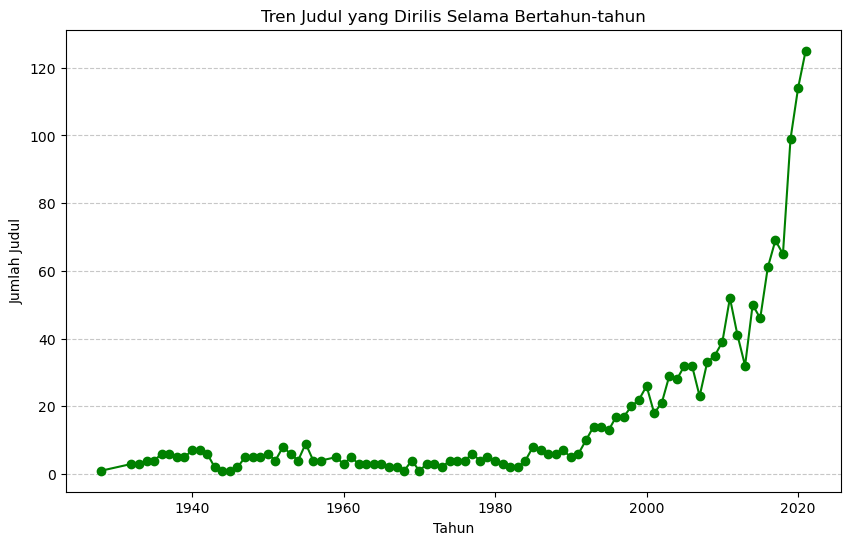

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
data['release_year'].value_counts().sort_index().plot(kind='line', marker='o', color='green')
plt.title('Tren Judul yang Dirilis Selama Bertahun-tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Judul')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

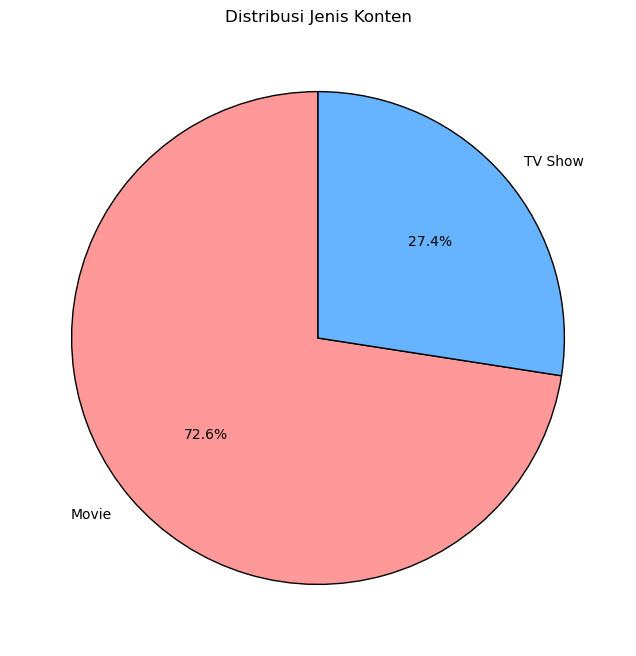

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

content_type_counts = data['type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(content_type_counts, labels=content_type_counts.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Distribusi Jenis Konten')
plt.show()